In [3]:
# Import Libraries
import Metrica_IO as mio
import Metrica_Viz as mviz
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon
from math import sqrt

# Set the path and game_id
DATADIR = r'C:\Users\paul9977\Documents\Projects\Soccer Analytics\Friends of Tracking\LaurieOnTracking\sample-data-master\data'
game_id=2

# Let's read in the tracking data and then convert it to metric
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

# Pull in the event data
events = mio.read_event_data(DATADIR, game_id)

Reading team: home
Reading team: away


In [4]:
away_goals = events[(events.Subtype.str.contains("-GOAL", na=False)) & (events['Team']=='Away')]
away_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,0.92,0.46,1.01,0.48
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,0.12,0.52,-0.02,0.54


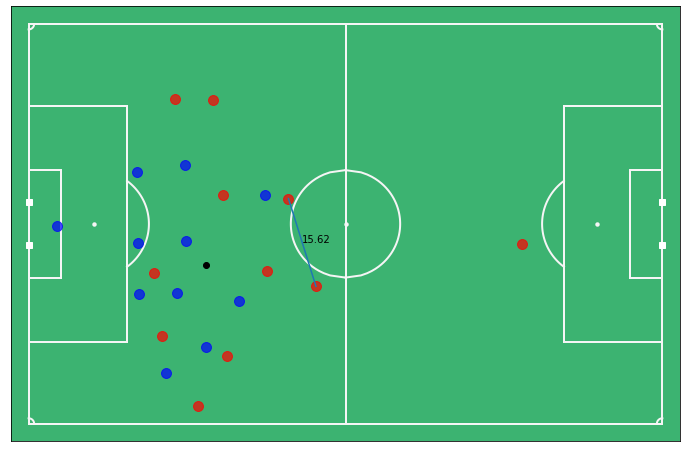

In [5]:
# Plot the player's positions
fig, ax = mviz.plot_frame(tracking_home.loc[11456], tracking_away.loc[11456])
homedcbx = [tracking_home['Home_2_x'][11456], tracking_home['Home_3_x'][11456]]
homedcby = [tracking_home['Home_2_y'][11456], tracking_home['Home_3_y'][11456]]
plt.plot(homedcbx, homedcby)
plt.text((homedcbx[0] + homedcbx[1])/2, (homedcby[0] + homedcby[1])/2, str(round(sqrt((homedcbx[1] - homedcbx[0])**2 + (homedcby[1] - homedcby[0])**2),2)))
plt.show()

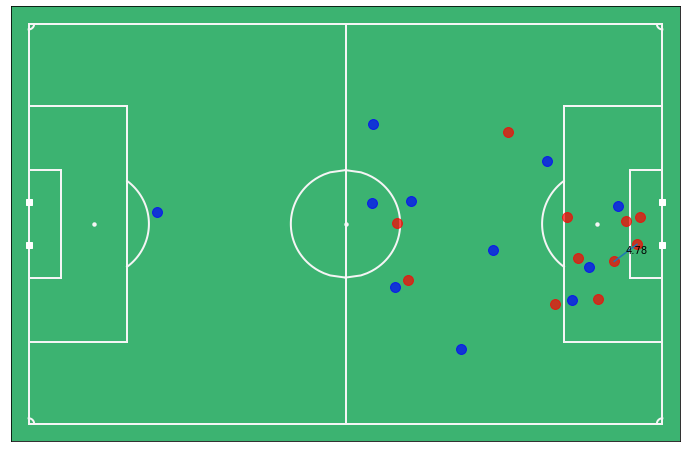

4.78


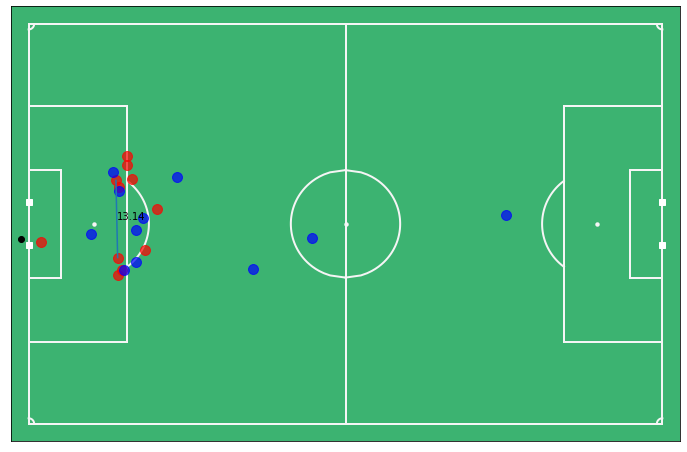

13.14


In [6]:
for i, row in away_goals.iterrows():
    fig, ax = mviz.plot_frame(tracking_home.loc[row['End Frame']], tracking_away.loc[row['End Frame']])
    homedcbx = [tracking_home['Home_2_x'][row['End Frame']], tracking_home['Home_3_x'][row['End Frame']]]
    homedcby = [tracking_home['Home_2_y'][row['End Frame']], tracking_home['Home_3_y'][row['End Frame']]]
    plt.plot(homedcbx, homedcby)
    plt.text((homedcbx[0] + homedcbx[1])/2, (homedcby[0] + homedcby[1])/2, str(round(sqrt((homedcbx[1] - homedcbx[0])**2 + (homedcby[1] - homedcby[0])**2),2)))
    plt.show()
    print(round(sqrt((homedcbx[1] - homedcbx[0])**2 + (homedcby[1] - homedcby[0])**2),2))

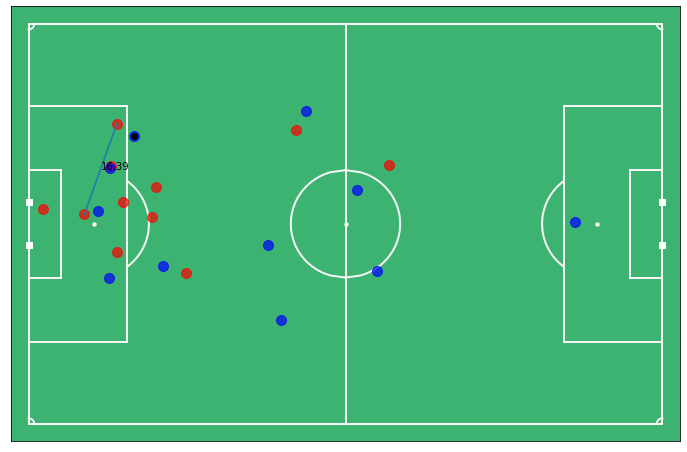

16.39


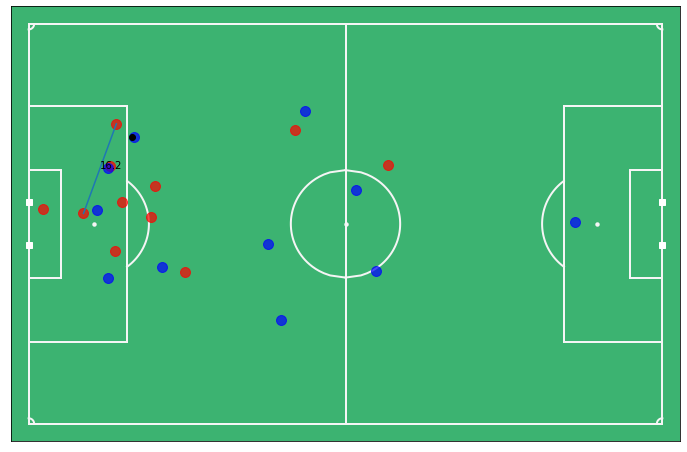

16.2


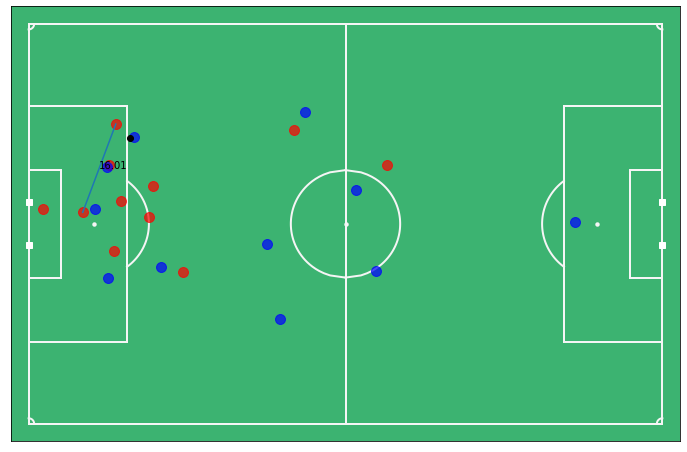

16.01


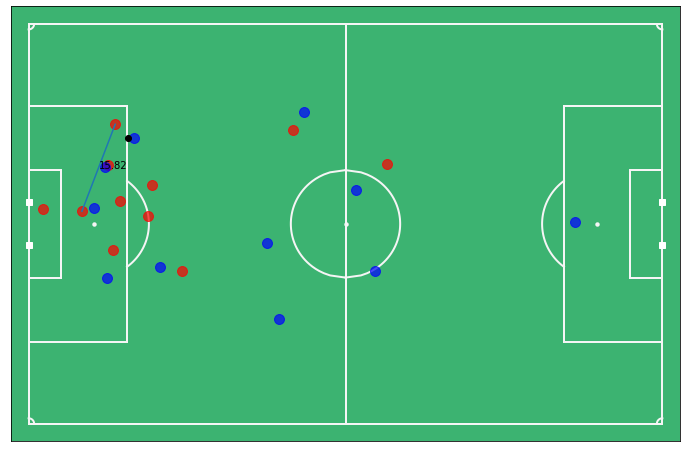

15.82


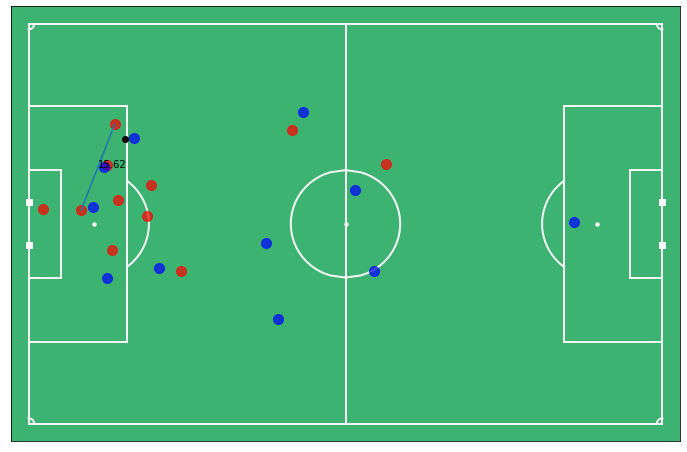

15.62


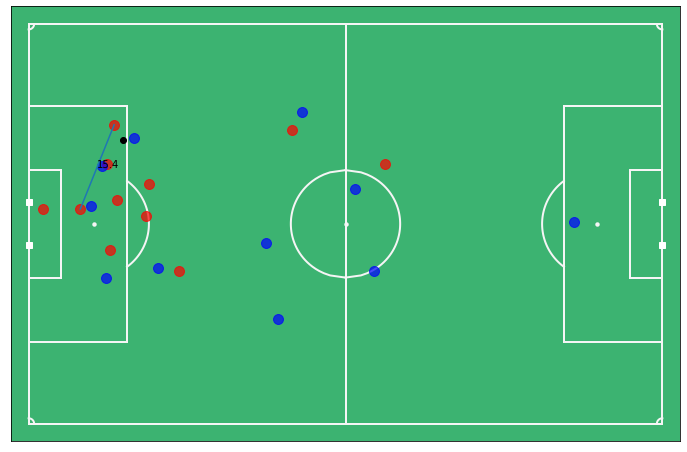

15.4


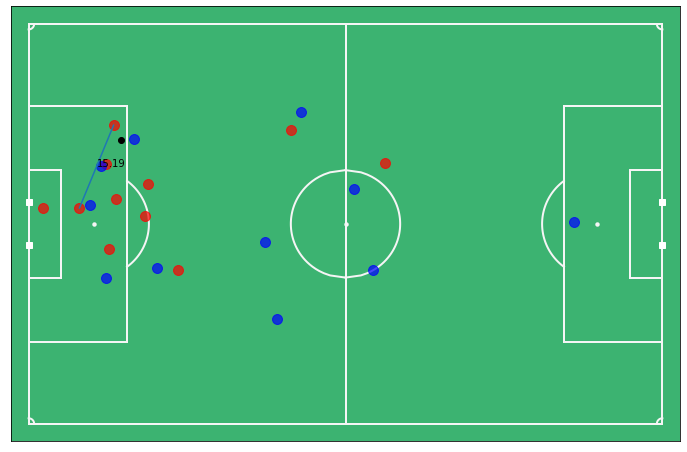

15.19


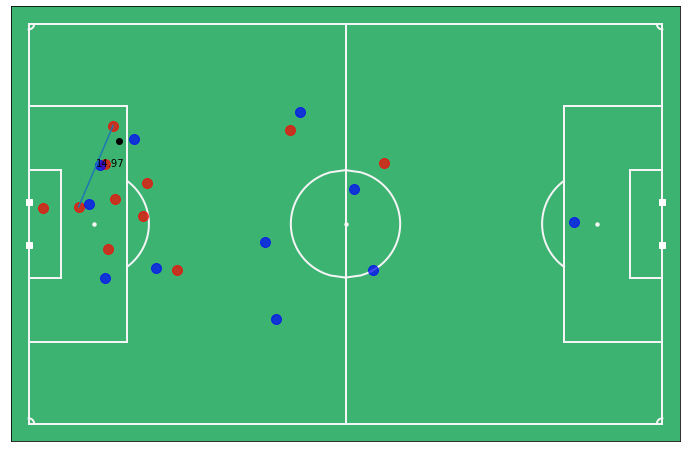

14.97


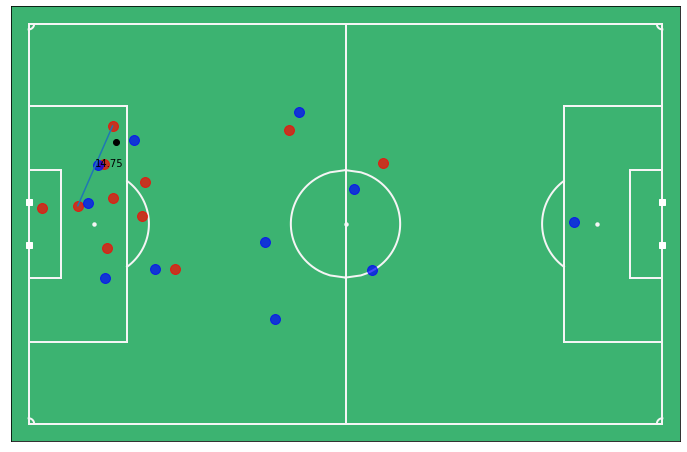

14.75


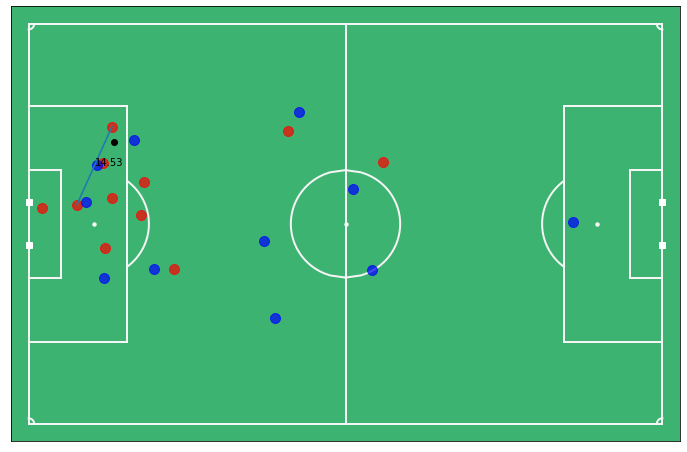

14.53


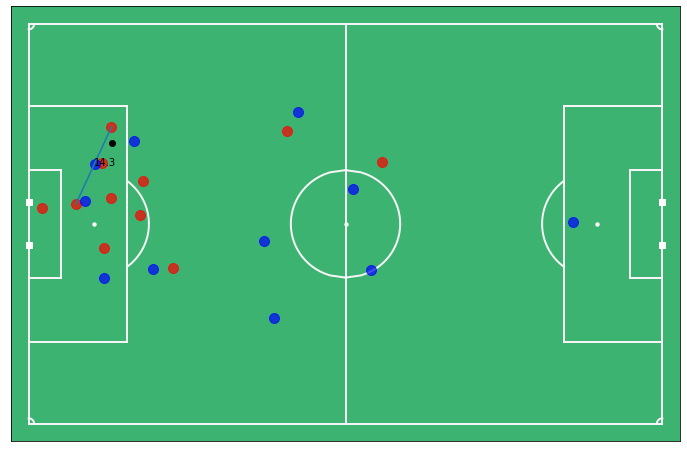

14.3


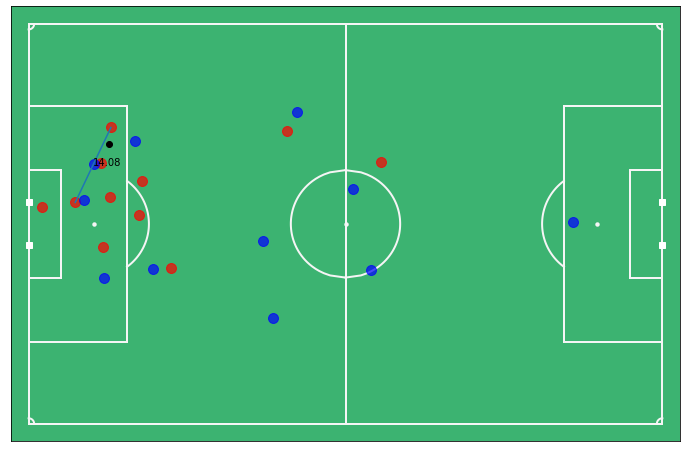

14.08


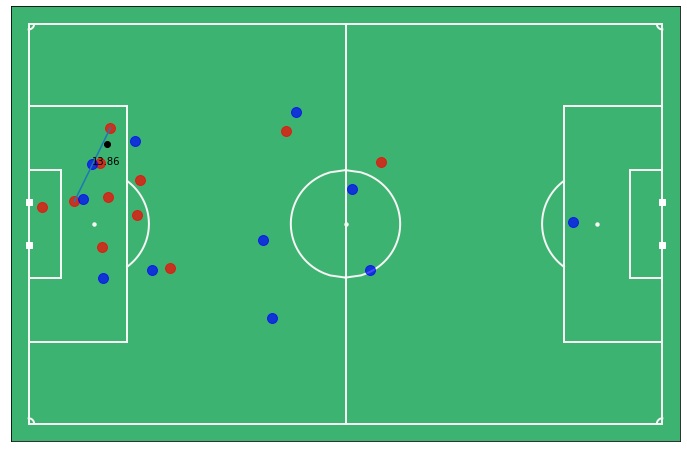

13.86


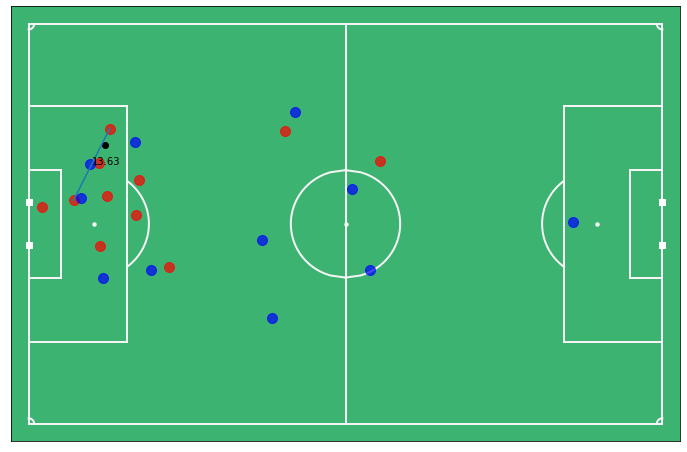

13.63


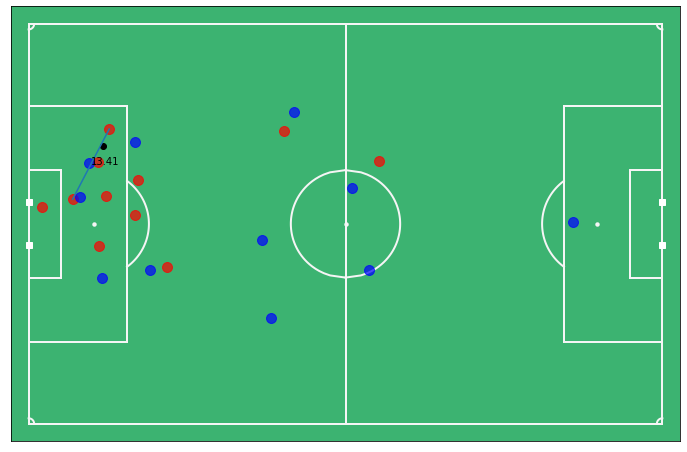

13.41


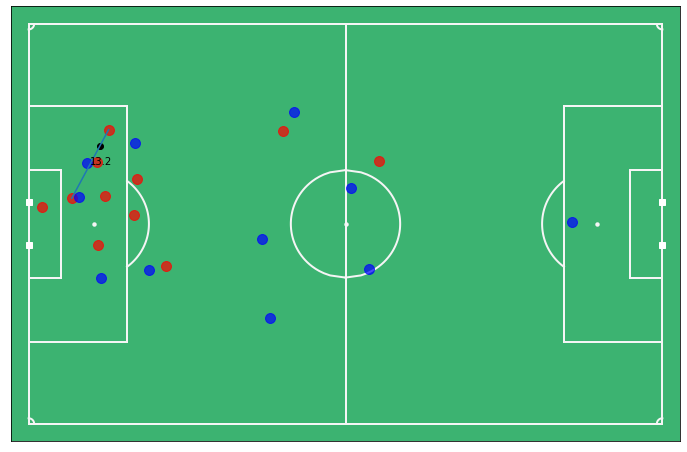

13.2


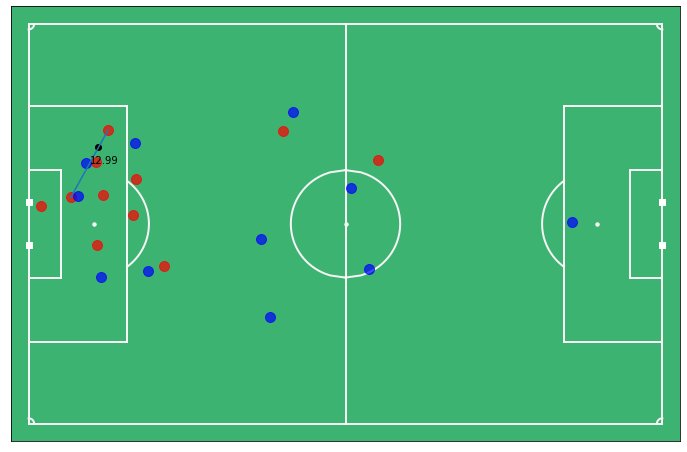

12.99


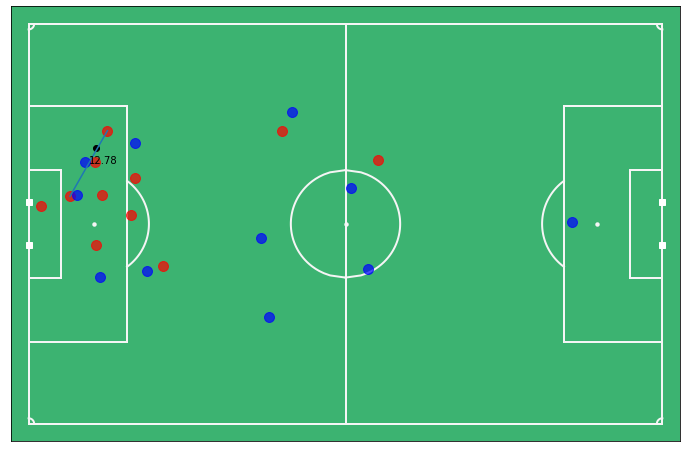

12.78


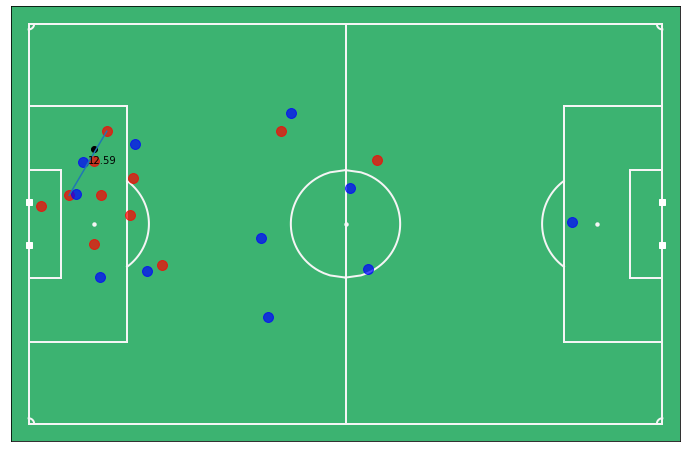

12.59


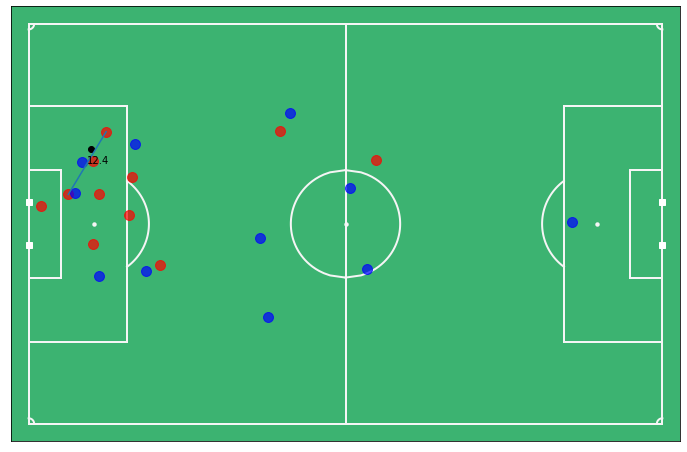

12.4


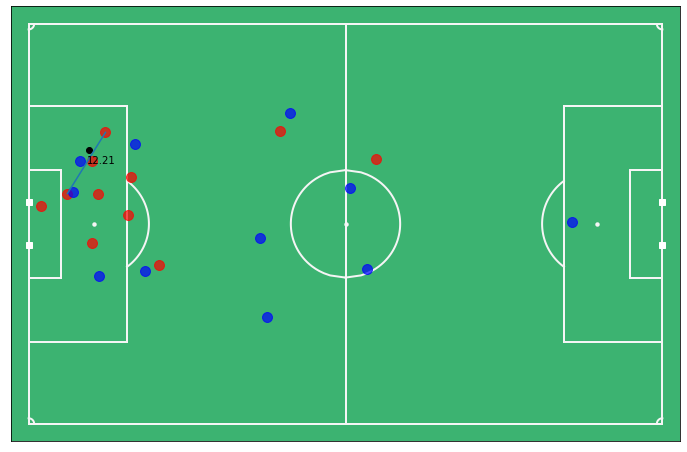

12.21


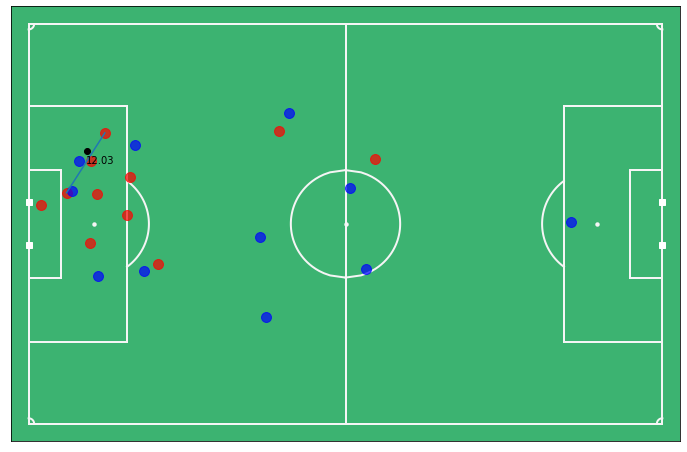

12.03


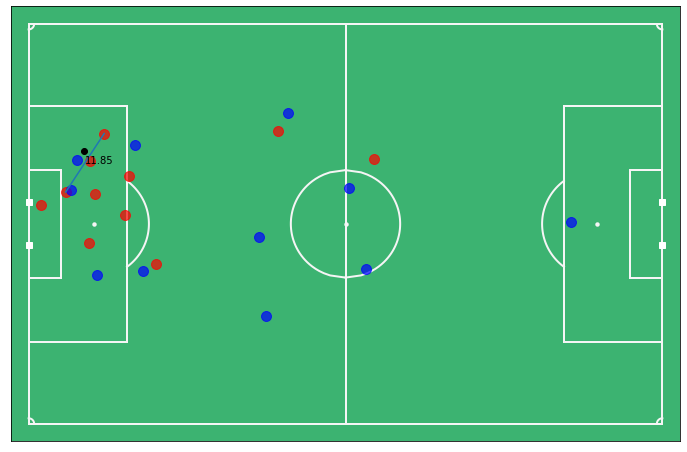

11.85


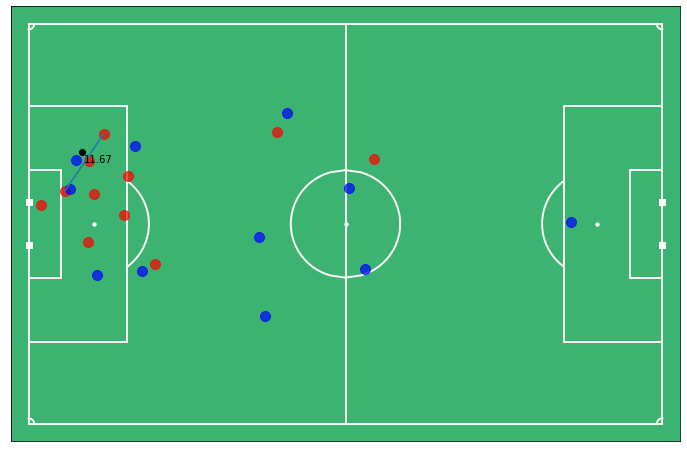

11.67


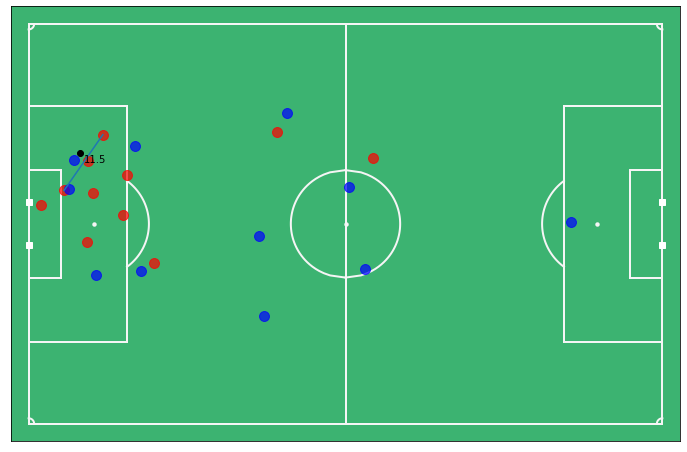

11.5


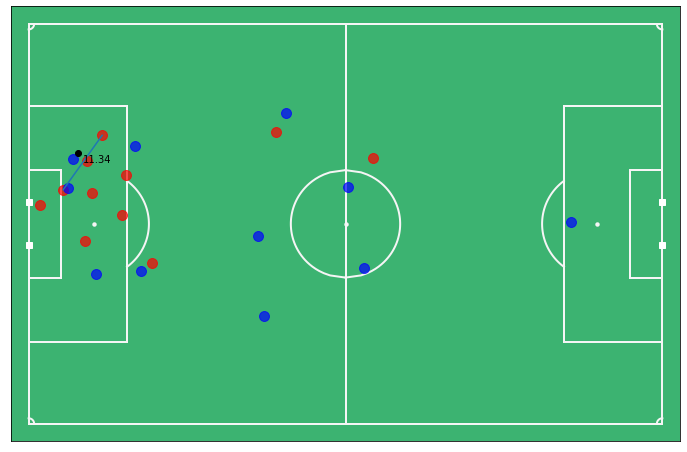

11.34


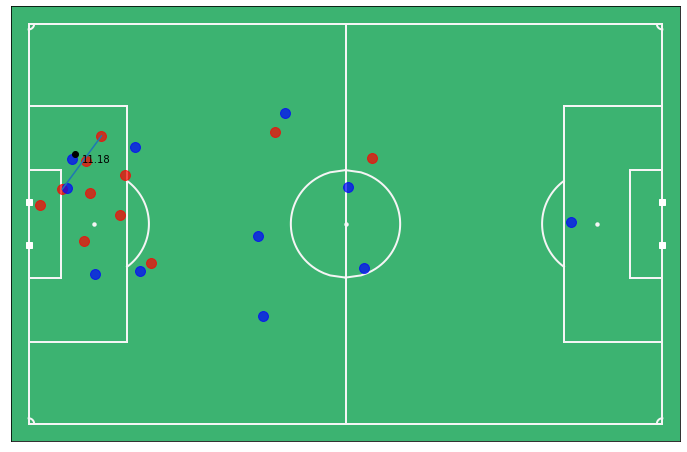

11.18


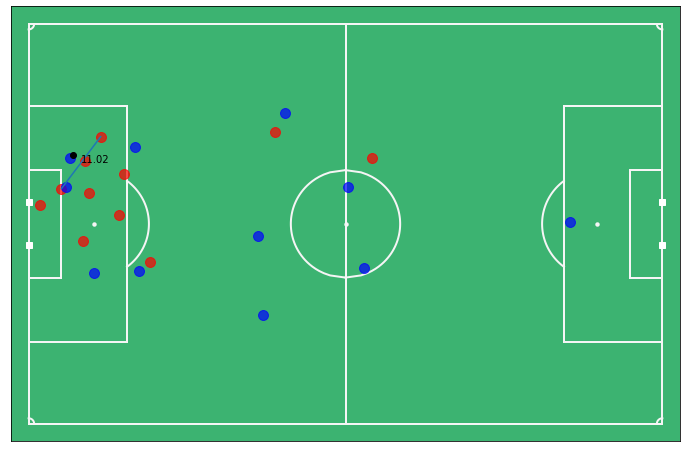

11.02


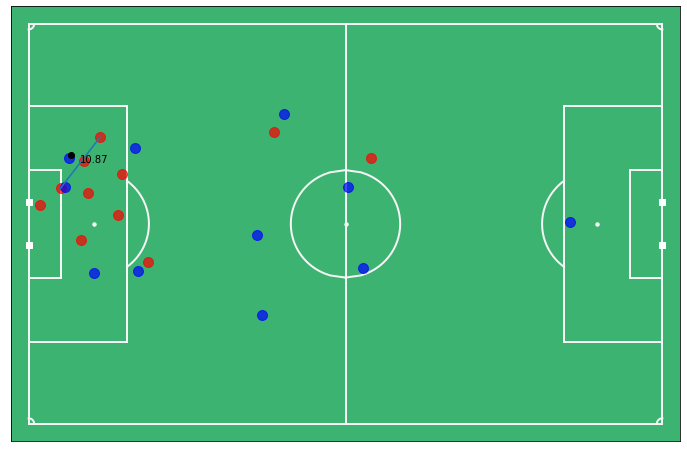

10.87


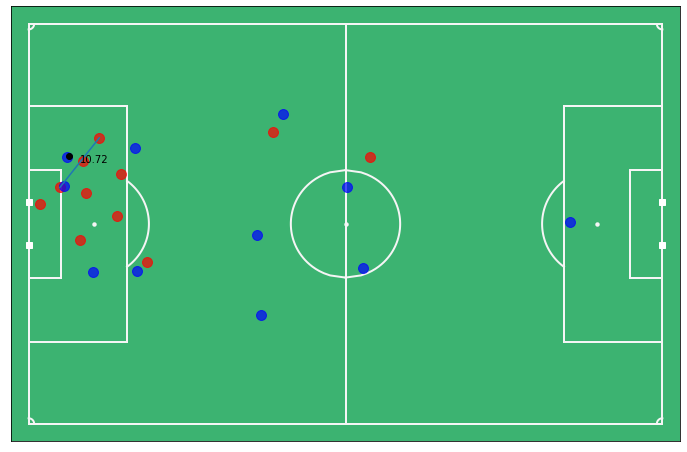

10.72


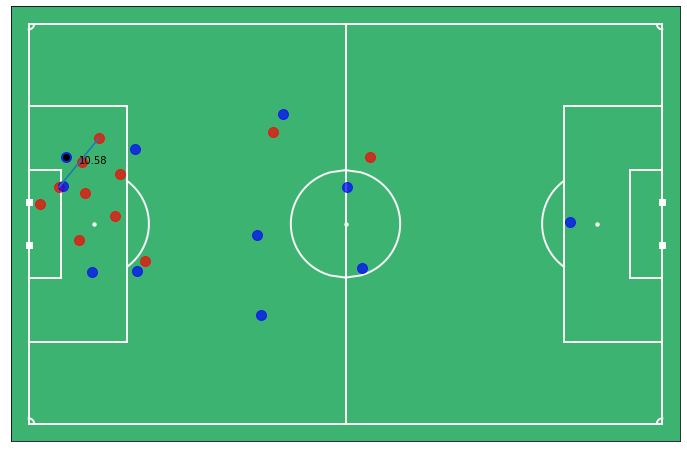

10.58


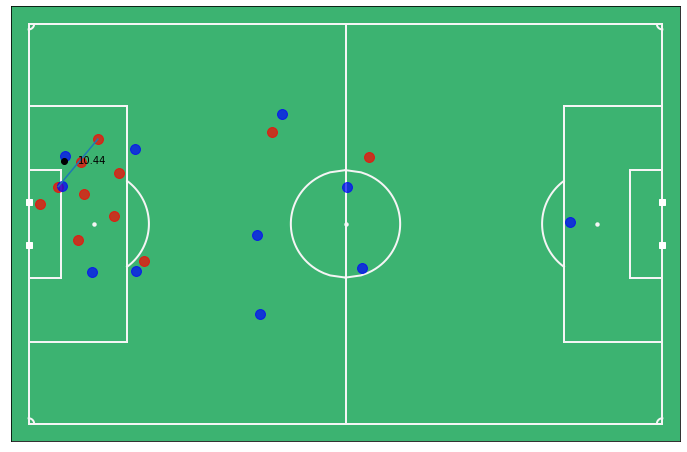

10.44


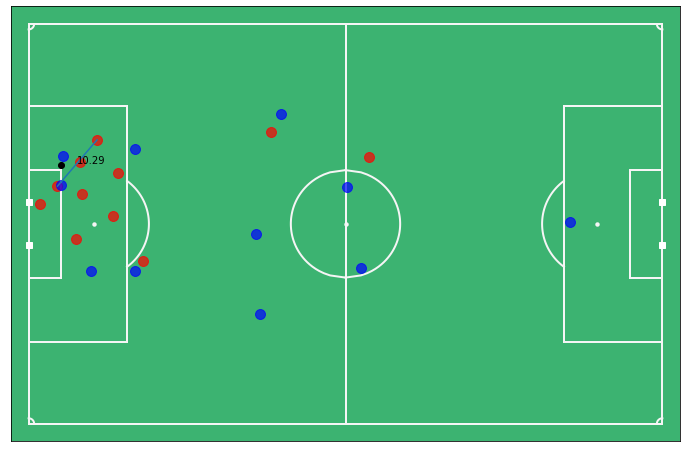

10.29


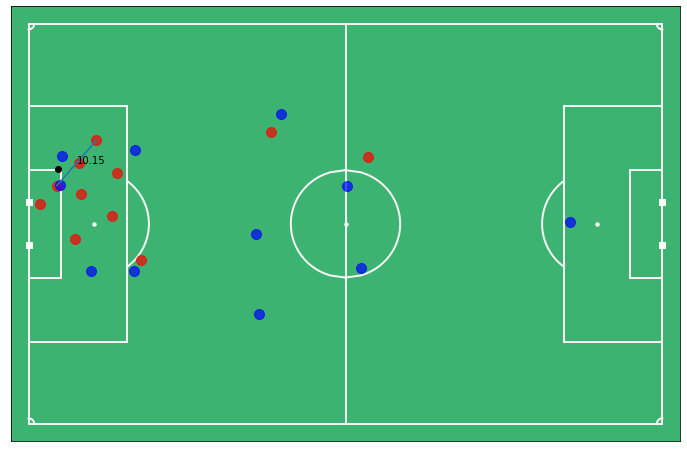

10.15


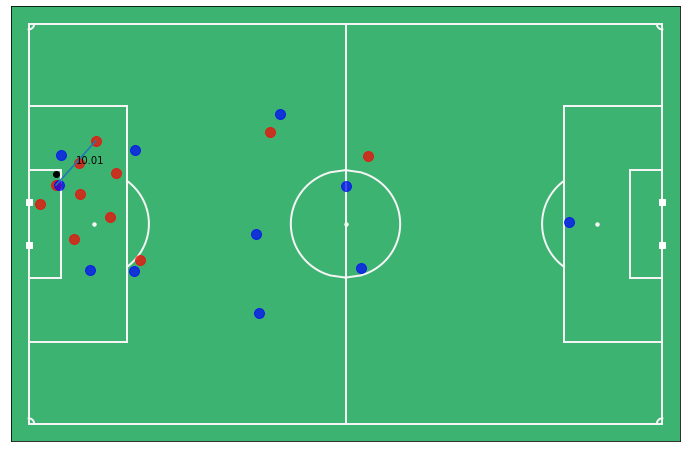

10.01


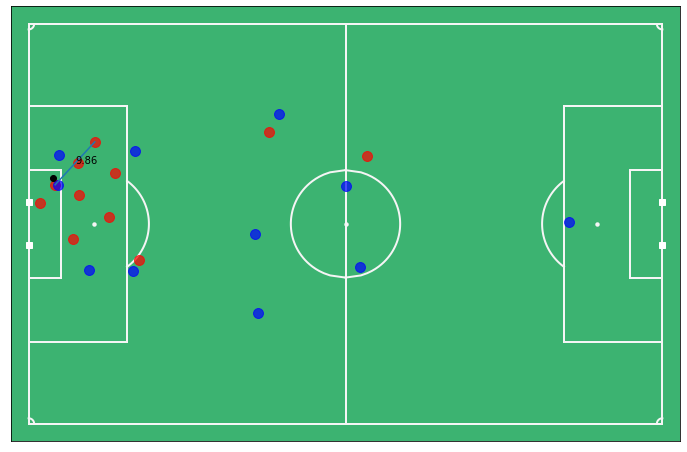

9.86


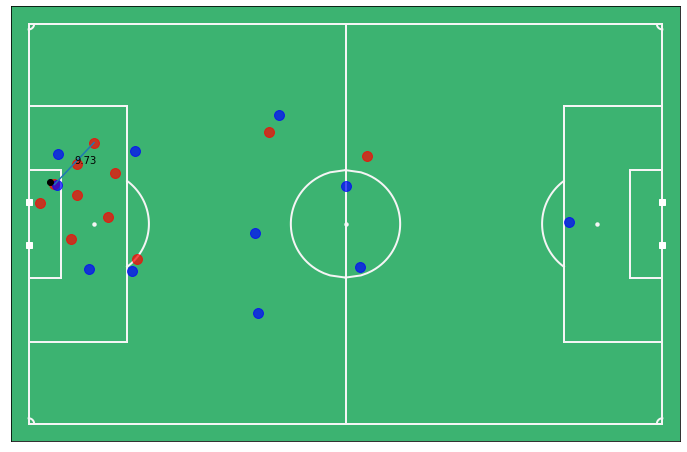

9.73


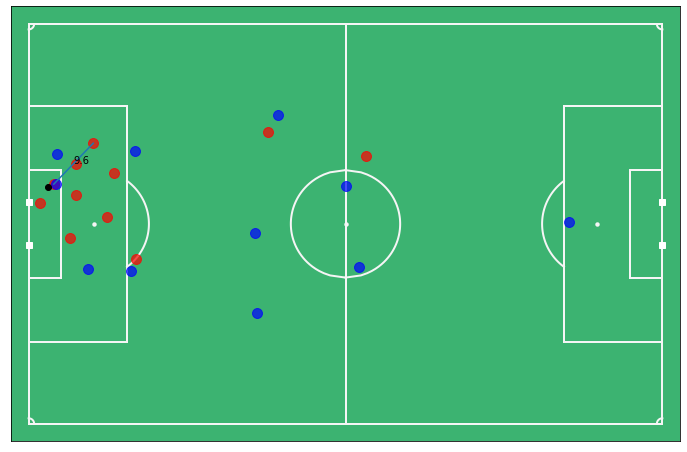

9.6


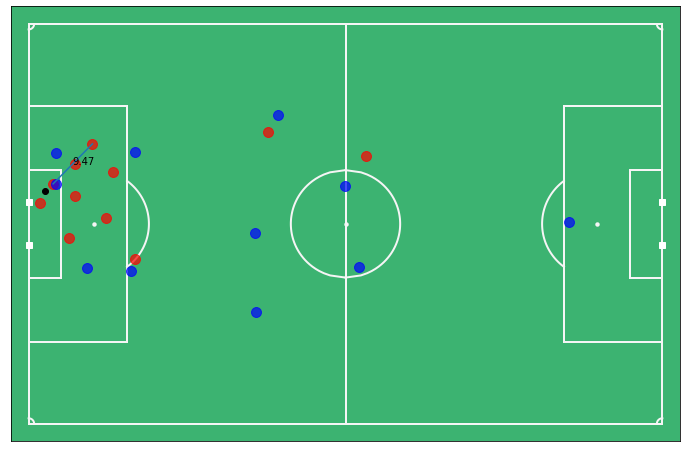

9.47


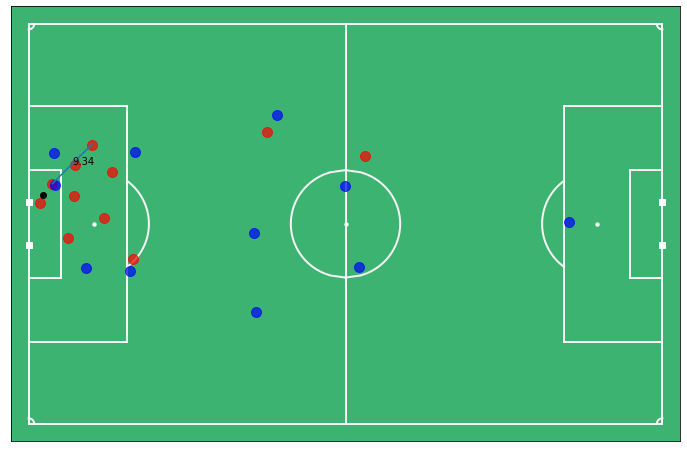

9.34


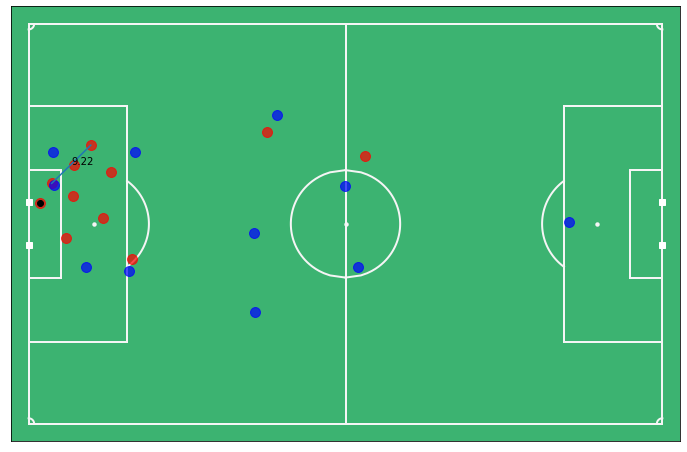

9.22


In [7]:
for i in range(90135, 90176):
    fig, ax = mviz.plot_frame(tracking_home.loc[i], tracking_away.loc[i])
    homedcbx = [tracking_home['Home_2_x'][i], tracking_home['Home_3_x'][i]]
    homedcby = [tracking_home['Home_2_y'][i], tracking_home['Home_3_y'][i]]
    plt.plot(homedcbx, homedcby)
    plt.text((homedcbx[0] + homedcbx[1])/2, (homedcby[0] + homedcby[1])/2, str(round(sqrt((homedcbx[1] - homedcbx[0])**2 + (homedcby[1] - homedcby[0])**2),2)))
    plt.show()
    print(round(sqrt((homedcbx[1] - homedcbx[0])**2 + (homedcby[1] - homedcby[0])**2),2))

In [8]:
shots = events[events['Type']=='SHOT']

In [18]:
cbdistances = []
i=1
for index, row in shots.iterrows():
    shot_frame = row['End Frame']
    pass_frame = events.iloc[(index-1)]['Start Frame']
#     if shot_frame == pass_frame:
#         pass_frame = events.iloc[(index-2)]['Start Frame']
    if row['Team']=='Away':
        # Get locations of center backs
        homedcbx_shot = [tracking_home['Home_2_x'][shot_frame], tracking_home['Home_3_x'][shot_frame]]
        homedcby_shot = [tracking_home['Home_2_y'][shot_frame], tracking_home['Home_3_y'][shot_frame]]
        homedcbx_pass = [tracking_home['Home_2_x'][pass_frame], tracking_home['Home_3_x'][pass_frame]]
        homedcby_pass = [tracking_home['Home_2_y'][pass_frame], tracking_home['Home_3_y'][pass_frame]]
        #Calculate Distances
        defender_distance_pass = sqrt((homedcbx_pass[1] - homedcbx_pass[0])**2 + (homedcby_pass[1] - homedcby_pass[0])**2)
        defender_distance_shot = sqrt((homedcbx_shot[1] - homedcbx_shot[0])**2 + (homedcby_shot[1] - homedcby_shot[0])**2)

    else:
        # Get locations of center backs
        homedcbx_shot = [tracking_away['Away_16_x'][shot_frame], tracking_away['Away_17_x'][shot_frame]]
        homedcby_shot = [tracking_away['Away_16_y'][shot_frame], tracking_away['Away_17_y'][shot_frame]]
        homedcbx_pass = [tracking_away['Away_16_x'][pass_frame], tracking_away['Away_17_x'][pass_frame]]
        homedcby_pass = [tracking_away['Away_16_y'][pass_frame], tracking_away['Away_17_y'][pass_frame]]
       #Calculate Distances
        defender_distance_pass = sqrt((homedcbx_pass[1] - homedcbx_pass[0])**2 + (homedcby_pass[1] - homedcby_pass[0])**2)
        defender_distance_shot = sqrt((homedcbx_shot[1] - homedcbx_shot[0])**2 + (homedcby_shot[1] - homedcby_shot[0])**2)

    attributes = {
        "Pass Frame": pass_frame,
        "Shot Frame": shot_frame,
        "Event Index": index,
        "Team": row['Team'],
        "Defender Distance At Pass": defender_distance_pass,
        "Defender Distance At Shot": defender_distance_shot,
        "Defender Distance Difference": defender_distance_shot-defender_distance_pass,
        "Result": row['Subtype'],
        "From": events.iloc[(index-1)]['From']}
    cbdistances.append(attributes)
    print(str(i)+" out of "+str(len(shots))+" Completed.")
    i+=1

df = pd.DataFrame(cbdistances)

1 out of 24 Completed.
2 out of 24 Completed.
3 out of 24 Completed.
4 out of 24 Completed.
5 out of 24 Completed.
6 out of 24 Completed.
7 out of 24 Completed.
8 out of 24 Completed.
9 out of 24 Completed.
10 out of 24 Completed.
11 out of 24 Completed.
12 out of 24 Completed.
13 out of 24 Completed.
14 out of 24 Completed.
15 out of 24 Completed.
16 out of 24 Completed.
17 out of 24 Completed.
18 out of 24 Completed.
19 out of 24 Completed.
20 out of 24 Completed.
21 out of 24 Completed.
22 out of 24 Completed.
23 out of 24 Completed.
24 out of 24 Completed.


In [19]:
disturbed = df[abs(df['Defender Distance Difference'])>=2]

In [20]:
abs(df['Defender Distance Difference']).mean()

2.039106170104467

In [23]:
non_setPiece = df[df['Shot Frame']!=df['Pass Frame']]
non_setPiece

,Pass Frame,Shot Frame,Event Index,Team,Defender Distance At Pass,Defender Distance At Shot,Defender Distance Difference,Result,From
0,4402,4443,83,Home,6.776163,5.056859,-1.719304,OFF TARGET-OUT,Player9
1,12180,12212,198,Home,7.972776,9.315511,1.342735,ON TARGET-GOAL,Player1
2,16388,16499,252,Home,6.532590,4.819674,-1.712916,ON TARGET-SAVED,Player9
3,18480,18520,297,Away,8.026808,9.506087,1.479279,BLOCKED,Player22
4,27311,27360,431,Home,1.644628,5.291330,3.646702,HEAD-OFF TARGET-OUT,Player9
5,29699,29777,472,Home,5.920138,7.772421,1.852283,ON TARGET-SAVED,Player8
6,53027,53075,823,Away,3.935840,4.778428,0.842589,ON TARGET-GOAL,Player23
7,56059,56131,852,Home,7.119306,2.628193,-4.491113,HEAD-OFF TARGET-OUT,Player1
8,63311,63372,962,Away,12.189757,13.133889,0.944132,OFF TARGET-HEAD-OUT,Player22
9,64770,64799,980,Away,4.274610,4.650472,0.375862,ON TARGET-SAVED,Player20


In [25]:
non_setPiece['Absolute Defender Distance'] = abs(non_setPiece['Defender Distance Difference'])
non_setPiece

,Pass Frame,Shot Frame,Event Index,Team,Defender Distance At Pass,Defender Distance At Shot,Defender Distance Difference,Result,From,Absolute Defender Distance
0,4402,4443,83,Home,6.776163,5.056859,-1.719304,OFF TARGET-OUT,Player9,1.719304
1,12180,12212,198,Home,7.972776,9.315511,1.342735,ON TARGET-GOAL,Player1,1.342735
2,16388,16499,252,Home,6.532590,4.819674,-1.712916,ON TARGET-SAVED,Player9,1.712916
3,18480,18520,297,Away,8.026808,9.506087,1.479279,BLOCKED,Player22,1.479279
4,27311,27360,431,Home,1.644628,5.291330,3.646702,HEAD-OFF TARGET-OUT,Player9,3.646702
5,29699,29777,472,Home,5.920138,7.772421,1.852283,ON TARGET-SAVED,Player8,1.852283
6,53027,53075,823,Away,3.935840,4.778428,0.842589,ON TARGET-GOAL,Player23,0.842589
7,56059,56131,852,Home,7.119306,2.628193,-4.491113,HEAD-OFF TARGET-OUT,Player1,4.491113
8,63311,63372,962,Away,12.189757,13.133889,0.944132,OFF TARGET-HEAD-OUT,Player22,0.944132
9,64770,64799,980,Away,4.274610,4.650472,0.375862,ON TARGET-SAVED,Player20,0.375862


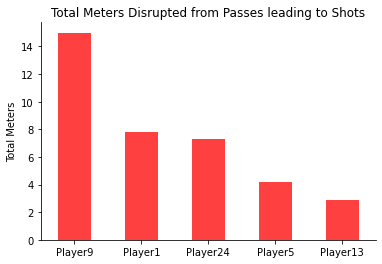

In [109]:
import matplotlib
fig, ax = plt.subplots()
bargraph = non_setPiece.groupby("From")["Absolute Defender Distance"].sum().sort_values(ascending=False).head().plot(kind='bar', color='red', alpha=.75)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('Total Meters')
plt.title('Total Meters Disrupted from Passes leading to Shots')
plt.xlabel('')
plt.xticks(rotation=0)
plt.savefig("Player Analysis")

In [13]:
counts = non_setPiece['Team'].value_counts()

home_shots = counts[0]
away_shots = counts[1]

disrupted_defense = df[abs(df['Defender Distance Difference'])>=2]['Team'].value_counts()

home_disruption = disrupted_defense[0]
away_disruption = disrupted_defense[1]

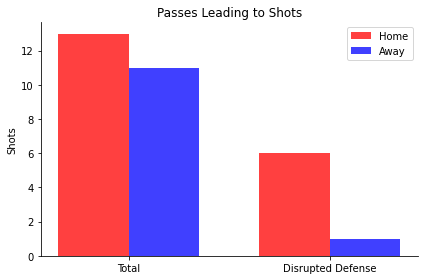

In [110]:
import numpy as np
import matplotlib.pyplot as plt

#Create Data
home_shots=(13,6)
away_shots=(11,1)

# create plot
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, home_shots, bar_width,
alpha=0.75,
color='r',
label='Home')

rects2 = plt.bar(index + bar_width, away_shots, bar_width,
alpha=0.75,
color='b',
label='Away')

plt.ylabel('Shots')
plt.title('Passes Leading to Shots')
plt.xticks(index+bar_width/2, ("Total", "Disrupted Defense"))
plt.legend()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig("Disrupted Defense Shots.jpeg")

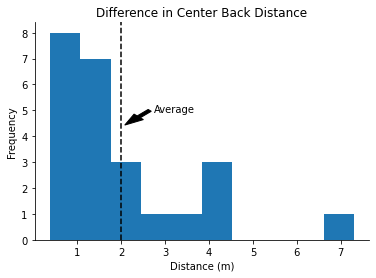

In [15]:
fig, ax = plt.subplots()
plt.title('Difference in Center Back Distance')
plt.hist(abs(non_setPiece['Defender Distance Difference']))
plt.axvline(2, color='black', ls='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('Frequency')
plt.xlabel('Distance (m)')

plt.text(2.75, 4.95,"Average")
plt.arrow(2.65, 5, -0.25, -0.25, width=0.1, color='black')

plt.savefig("Difference in Center Back Distance.jpg")
plt.show()